In [28]:
from sklearn.cluster import KMeans  
from sklearn.metrics import silhouette_score 

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA 
import pandas as pd
from adjustText import adjust_text
import matplotlib.pylab as plt

data = pd.read_csv('/Users/nivethida/Downloads/universities_pca_2.csv')

scaler = MinMaxScaler() # min max scaler
pcs = PCA(whiten=True)
scaledData = pd.DataFrame(pcs.fit_transform(scaler.fit_transform(data.iloc[:,1:])),
                      columns=['PC{}'.format(i) for i in range(1, len(data.iloc[:,1:].columns) + 1)]) 

cols=['PC1', 'PC2', 'PC3', 'PC4'] # I want to use four components as decided in Question 2

silhouette=[] 
inertia=[]
clusters=[]
for i in range(2,40):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(scaledData[cols])
    silhouette.append(silhouette_score(scaledData[cols],kmeans.labels_))
    inertia.append(kmeans.inertia_)
    clusters.append(i)

print('The max silhouette value is: ',max(silhouette))

# The max silhouette value is .24790
    

The max silhouette value is:  0.24790817427525624


In [29]:
kmeansEvaluvation=pd.DataFrame({'silhouette_score': silhouette,'inertia': inertia,},index=clusters)
kmeansEvaluvation.head(8)
# From kmeans_rval I could see that the max silhouette value is at 7 

,silhouette_score,inertia
2,0.195671,1537.064365
3,0.224127,1242.066680
4,0.232772,1032.877437
5,0.242852,873.815038
6,0.234080,795.741180
7,0.247908,723.554175
8,0.231479,675.467224
9,0.233063,635.667998


Text(0.5, 1.0, 'Scree Plot for Clusters VS Intertia')

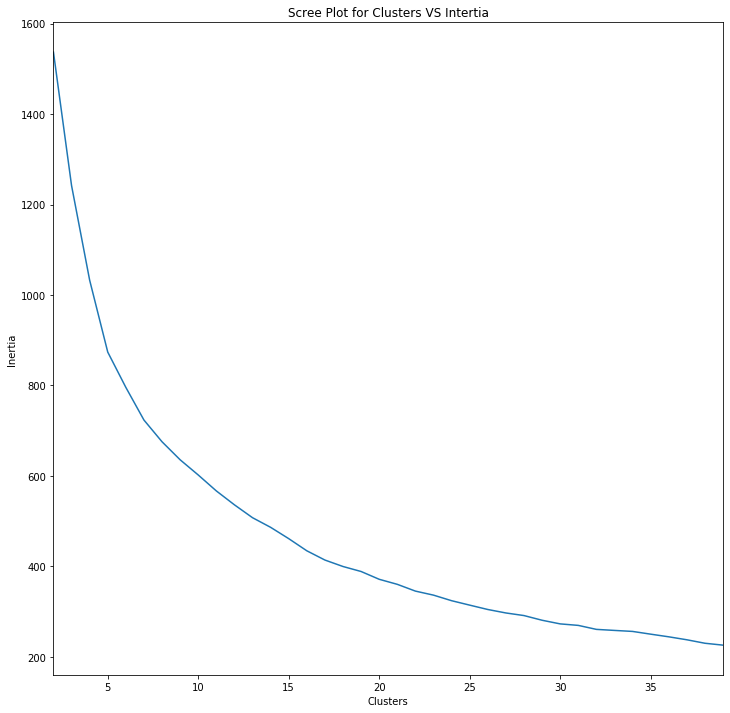

In [30]:
kmeansEvaluvation['inertia'].plot(figsize=(12, 12))
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('Scree Plot for Clusters VS Intertia')

# Looks like the inflection point is around 6 or 7

Text(0.5, 1.0, 'Silhouette scores Vs clusters')

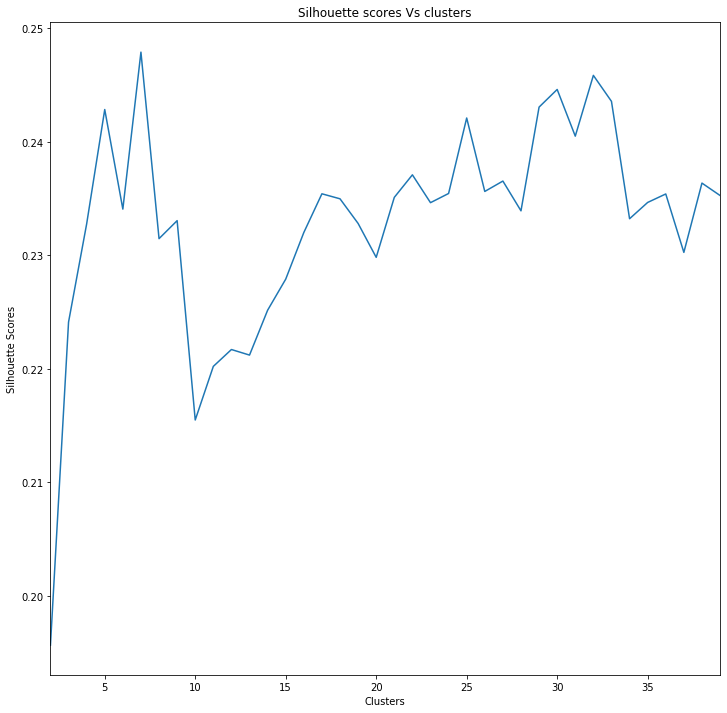

In [31]:
kmeansEvaluvation['silhouette_score'].plot(figsize=(12, 12))
plt.xlabel('Clusters')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette scores Vs clusters')

# The Silhouette score is at peak around 7 clusters for four components.

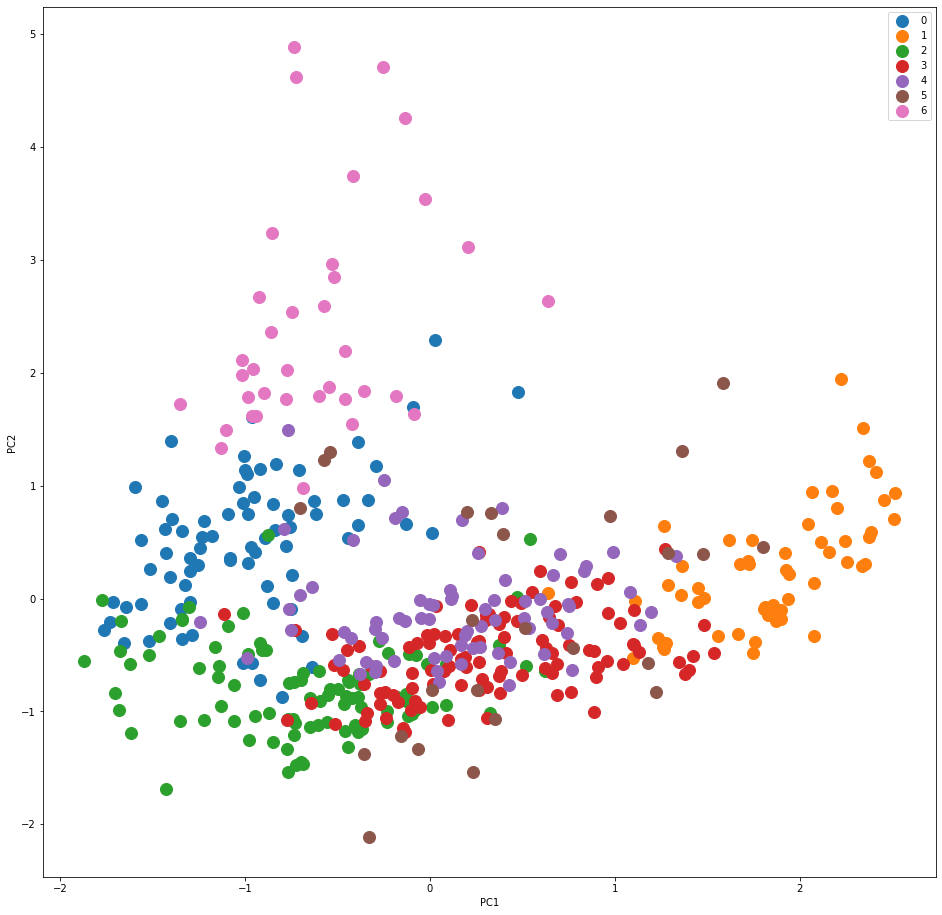

In [32]:
# Here taking clusters = 7 ans it is the ideal number of clusters based on the Silhouette score and Inertia
kmeans= KMeans(n_clusters=7).fit(scaledData[cols]) 
scaledData['cluster']=kmeans.labels_


groups = scaledData.groupby('cluster')

data['cluster']=scaledData['cluster']
ax = scaledData.plot.scatter(x='PC1', y='PC2', figsize=(16, 16))
points = scaledData[['PC1','PC2']]


for name, group in groups: 
    ax.plot(group.PC1, group.PC2, marker='o', linestyle='', ms=12, label=name) #grouping subplots
ax.legend() 

# Below scatter plots represents the 7 clusters with 7 center means. 

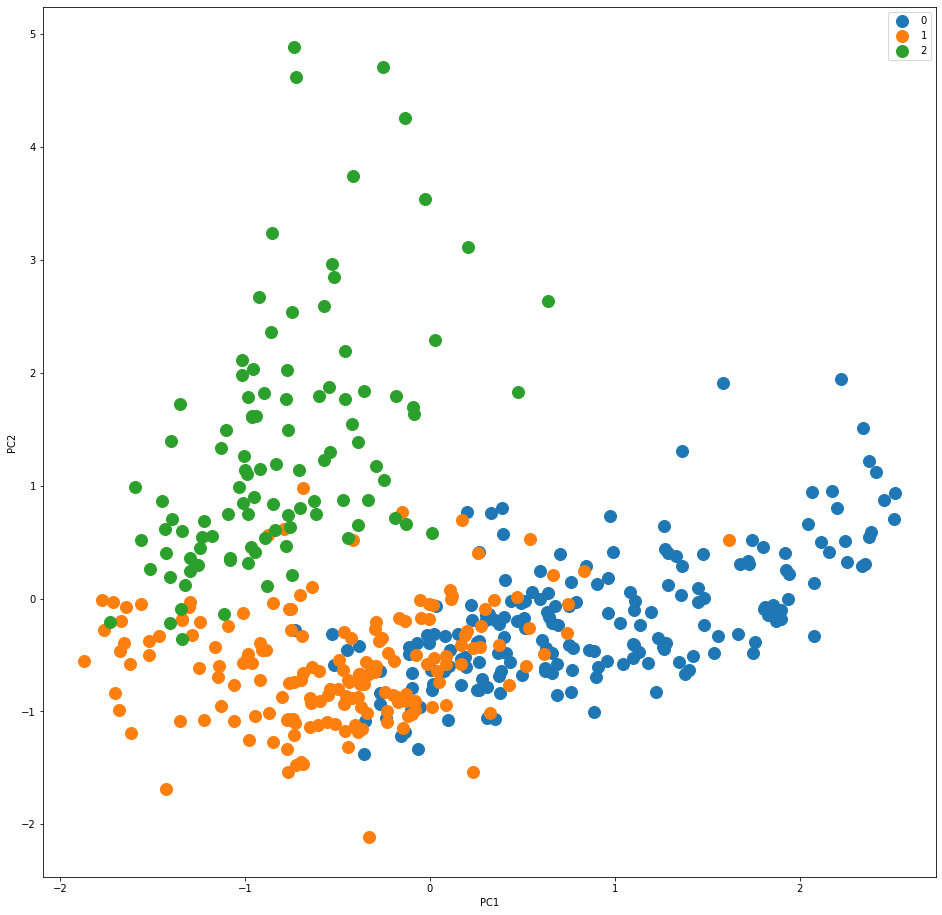

In [33]:
# Subcategory 4
# Here taking clusters = 3.
kmeans= KMeans(n_clusters=3).fit(scaledData[cols]) 
scaledData['cluster']=kmeans.labels_


groups = scaledData.groupby('cluster')

data['cluster']=scaledData['cluster']
ax = scaledData.plot.scatter(x='PC1', y='PC2', figsize=(16, 16))
points = scaledData[['PC1','PC2']]


for name, group in groups: 
    ax.plot(group.PC1, group.PC2, marker='o', linestyle='', ms=12, label=name) #grouping subplots
ax.legend() 

# Below scatter plots represents the 3 clusters with three centroids means and is easy to visualize with dilineations. 

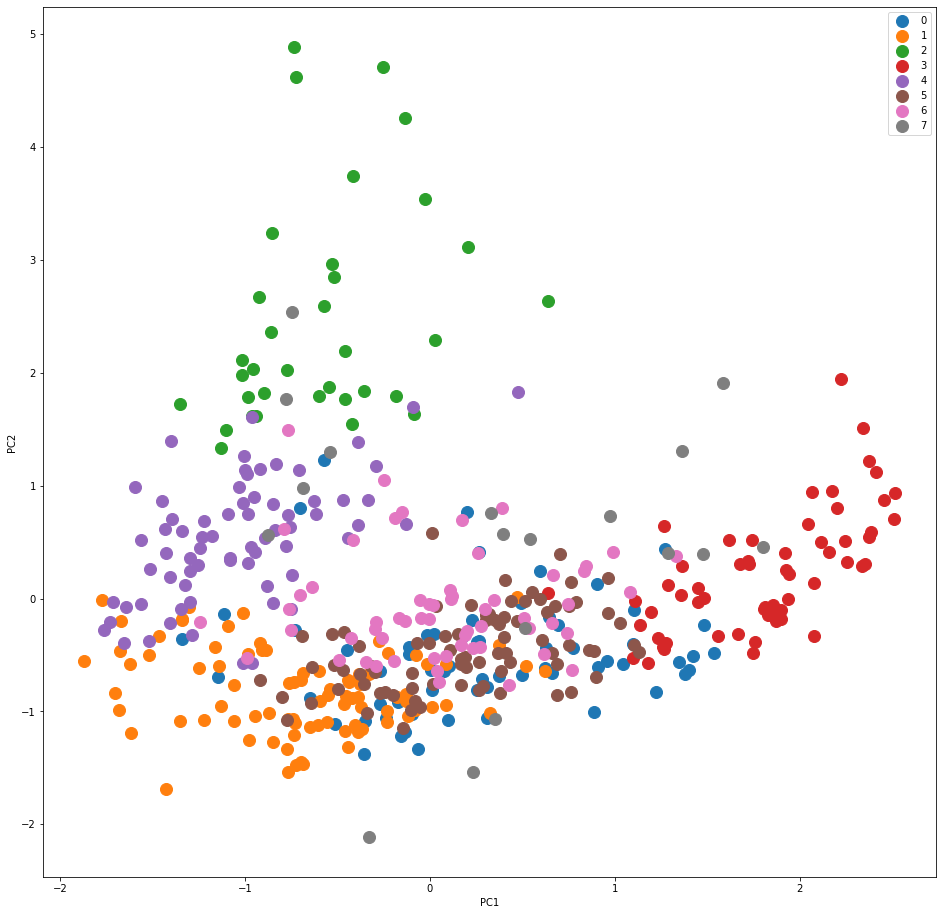

In [34]:
# What if we increase the cluster to 8
kmeans= KMeans(n_clusters=8).fit(scaledData[cols]) 
scaledData['cluster']=kmeans.labels_


groups = scaledData.groupby('cluster')

data['cluster']=scaledData['cluster']
ax = scaledData.plot.scatter(x='PC1', y='PC2', figsize=(16, 16))
points = scaledData[['PC1','PC2']]


for name, group in groups: 
    ax.plot(group.PC1, group.PC2, marker='o', linestyle='', ms=12, label=name) #grouping subplots
ax.legend() 

# Below scatter plots represents the 8 clusters with 8 new centroids for each cluster but no definite delineations.

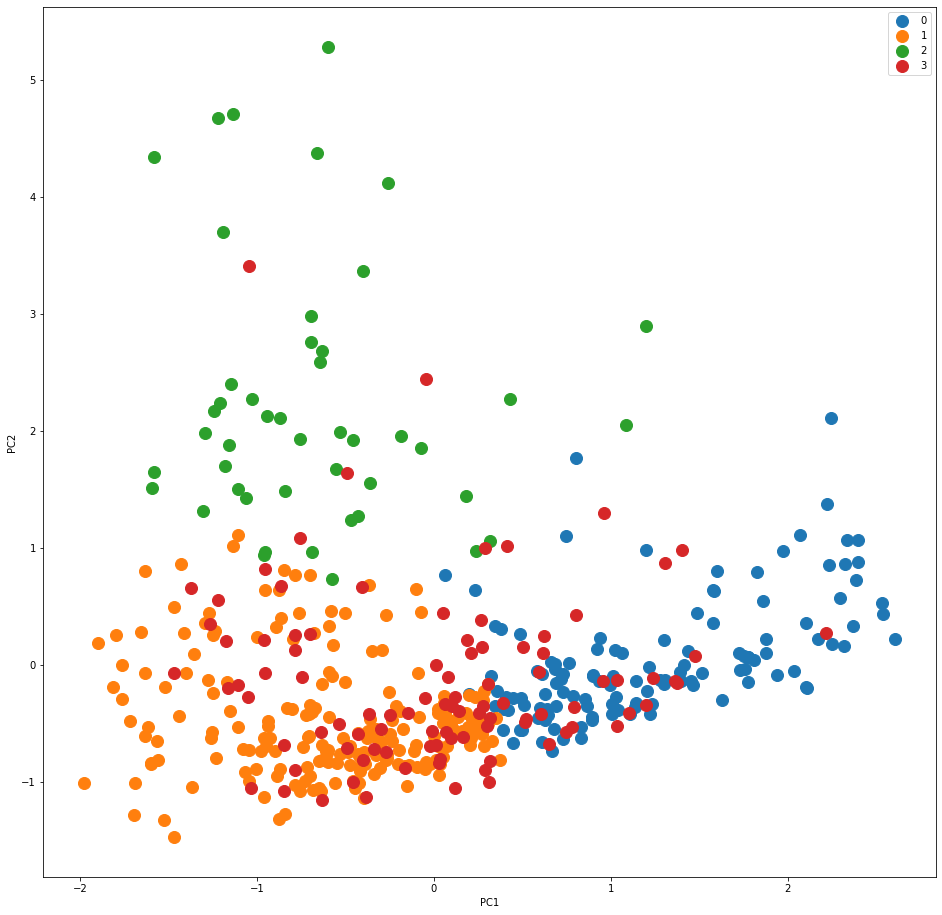

In [36]:
# Changing the standardisation method and plotting the kmeans clusters.
data = pd.read_csv('/Users/nivethida/Downloads/universities_pca_2.csv')

 
scaler = StandardScaler() # Standard scaler

pcs = PCA(whiten=True)
scaledData = pd.DataFrame(pcs.fit_transform(scaler.fit_transform(data.iloc[:,1:])),
                      columns=['PC{}'.format(i) for i in range(1, len(data.iloc[:,1:].columns) + 1)]) 
# Here i took clusters = 4

kmeans= KMeans(n_clusters=4).fit(scaledData[cols]) 
scaledData['cluster']=kmeans.labels_


groups = scaledData.groupby('cluster')

data['cluster']=scaledData['cluster']
ax = scaledData.plot.scatter(x='PC1', y='PC2', figsize=(16, 16))
points = scaledData[['PC1','PC2']]


for name, group in groups: 
    ax.plot(group.PC1, group.PC2, marker='o', linestyle='', ms=12, label=name)
ax.legend() 

# With with different standardisation method also the cluster shape didnt vary much,